# Aula 4.7 – Visualizando Relações com Scatterplots e Heatmaps

## 📘 O que é correlação?


Correlação é quando duas variáveis se movem juntas:

- Quando uma aumenta e a outra também → correlação **positiva**
- Quando uma aumenta e a outra diminui → correlação **negativa**
- Quando não há relação → correlação próxima de **zero**



**📊 O que é a força da correlação?**

A força da correlação é medida por um número chamado coeficiente de correlação (geralmente de Pearson), que vai de:


* -1 → correlação negativa perfeita
* 0 → nenhuma correlação  
* +1 → correlação positiva perfeita


**🧠 E o que isso implica na prática?**
1. Correlação forte (acima de 0.7 ou abaixo de -0.7)

    ✅ Pode indicar uma relação real e útil
    
    ➡️ Ex: Idade x Salário em cargos corporativos
    
    📌 Implica que uma variável pode prever a outra com boa confiança (em modelos de machine learning, por exemplo)

2. Correlação moderada (0.4 a 0.69)
    
    ⚠️ Pode haver relação, mas talvez com exceções ou ruídos
    
    ➡️ Ex: Tempo de sono x produtividade

3. Correlação fraca ou nula (abaixo de 0.4)
    
    🔍 Provavelmente são variáveis independentes entre si
   
    ➡️ Ex: Número de filhos x Nota no ENEM (não há relação direta)


**Exemplo clássico:**

> Sorvete vendido ↑ Afogamentos ↑

Correlação forte no verão, mas não há relação de causa entre um e outro. Ambos são causados pelo calor.


**✅ Dicas práticas para analistas**

* Use df.corr() + heatmap para encontrar correlações rapidamente

* Foque nas correlações fortes e moderadas para investigações ou modelos

* Sempre pergunte: “Faz sentido essa relação?” antes de tirar conclusões

## 🔧 Criando dados simulados

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Criar variáveis com diferentes padrões
tamanho = 100
idade = np.random.randint(18, 60, size=tamanho)
salario = idade * 500 + np.random.normal(0, 5000, size=tamanho)
horas_sono = np.random.normal(7, 1, size=tamanho)
horas_estudo = np.random.normal(2, 0.5, size=tamanho)
filhos = np.random.randint(0, 4, size=tamanho)

df = pd.DataFrame({
    'idade': idade,
    'salario': salario,
    'sono': horas_sono,
    'estudo': horas_estudo,
    'filhos': filhos
})

df.head()


,idade,salario,sono,estudo,filhos
0,56,27158.974560,6.853055,2.043283,1
1,46,28823.843228,7.180623,1.703559,3
2,32,14771.261563,7.964811,1.659998,1
3,25,8651.661132,5.935169,1.868297,1
4,38,25060.861711,7.108712,1.859673,3


## 📊 Scatterplot: Explorando Relações entre 2 Variáveis

Um scatterplot é um gráfico que mostra a relação entre duas variáveis numéricas. Cada ponto no gráfico representa um caso da sua base de dados — pode ser uma pessoa, um cliente, um produto, etc.

**📍 Como funciona?**

* Uma variável no eixo X (horizontal)

* Outra no eixo Y (vertical)

* Cada ponto mostra um par de valores.

**👀 Exemplo prático:**

Você tem uma tabela com Pessoa, Horas de Estudo	e Nota na Prova.

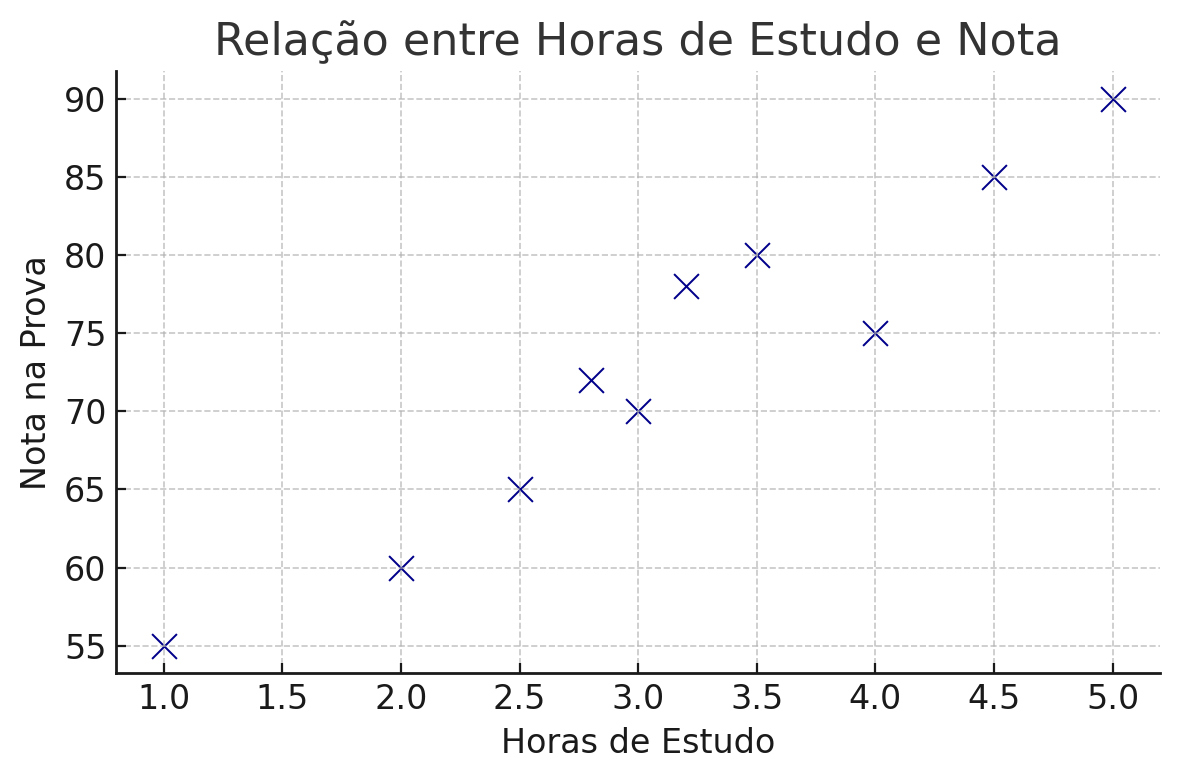

Se você fizer um scatterplot com você verá pontos subindo da esquerda para a direita.

> Isso mostra que quanto mais a pessoa estuda, maior tende a ser a nota.


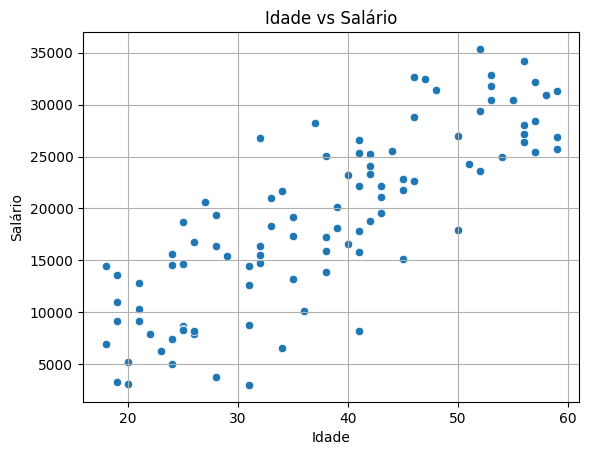

In [2]:

sns.scatterplot(data=df, x='idade', y='salario')
plt.title('Idade vs Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.show()


**📊 O que o scatterplot mostra?**

* Correlação positiva: os pontos sobem da esquerda pra direita → as variáveis crescem juntas

* Correlação negativa: os pontos descem → uma cresce, a outra diminui

* Sem relação clara: os pontos estão espalhados sem padrão

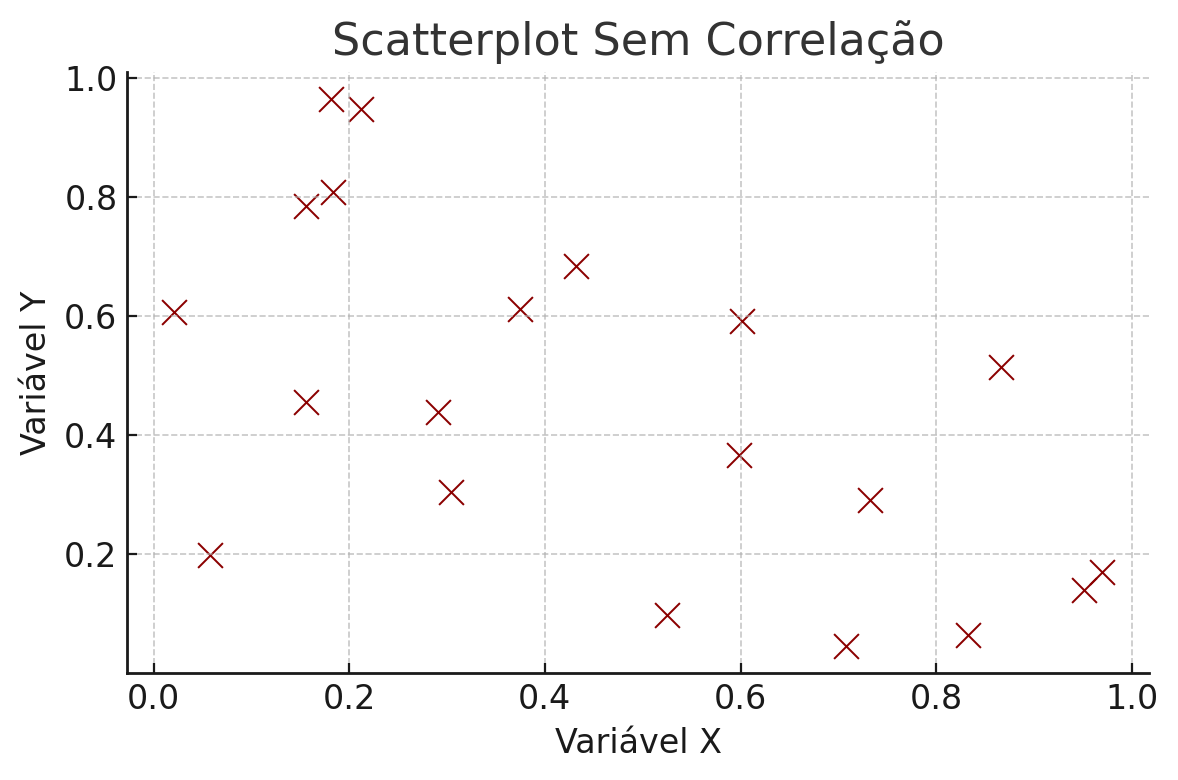

## 🔥 Heatmap: Correlação entre Variáveis

In [4]:
df.corr()

,idade,salario,sono,estudo,filhos
idade,1.000000,0.826410,-0.066733,-0.050742,0.036300
salario,0.826410,1.000000,-0.052534,-0.068463,0.009942
sono,-0.066733,-0.052534,1.000000,-0.093312,0.061578
estudo,-0.050742,-0.068463,-0.093312,1.000000,-0.015848
filhos,0.036300,0.009942,0.061578,-0.015848,1.000000


Um heatmap (ou mapa de calor) é uma imagem colorida que mostra a intensidade de alguma coisa — no nosso caso, a correlação entre variáveis numéricas. Ele te ajuda a enxergar quais variáveis estão mais relacionadas (positiva ou negativamente) com base na cor e no número.

**🎯 Pra que serve um heatmap de correlação?**

* Ele serve para responder perguntas como:

* Quais variáveis estão mais relacionadas?

* Tem alguma variável que se move junto com outra?

* Tem alguma relação negativa ou inversa?

**📏 Como interpretar as cores?**
Normalmente usamos uma escala como:

* 🔴 Vermelho forte (próximo de +1)	Correlação positiva forte
* 🔵 Azul forte (próximo de -1)	Correlação negativa forte
* ⚪ Branco / Claro (próximo de 0)	Pouca ou nenhuma correlação


**✅ O que você aprende com ele?**

* Quais variáveis têm maior influência entre si

* Quais podem ser úteis para modelos estatísticos ou machine learning

* Quais podem ser descartadas por não agregar nada

> ⚠️ Dica final: Use o heatmap após o tratamento dos dados (sem nulos, sem erros) e só com colunas numéricas!

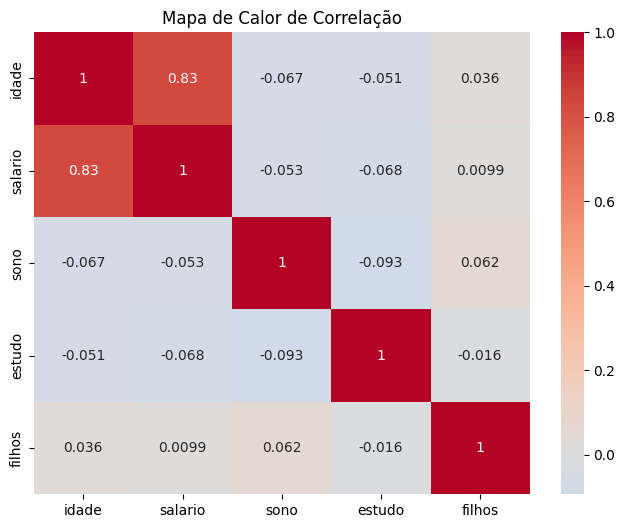

In [3]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlação')
plt.show()


## 🎯 Atividade prática


1. Crie um novo DataFrame com 3 ou mais variáveis numéricas.
2. Gere um scatterplot entre duas delas.
3. Construa o heatmap e identifique qual par tem maior correlação.
